***********************************************************************************************************************
# Import libraries
***********************************************************************************************************************

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.cluster.hierarchy as sch

********************************************************************************************************************************
# Descriptive analysis
********************************************************************************************************************************

### Read the csv file into a pandas data frame

In [2]:
data = pd.read_csv("Patient_Characteristics_Survey__PCS__2022__Persons_Served_by_Survey_Year__Region_of_Provider__Gender__Age_Group_and_Race_Ethnicity.csv")
data.head()
print(data.shape)

(206612, 76)


### Get more descriptive info about the dataset

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206612 entries, 0 to 206611
Data columns (total 76 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Survey Year                       206612 non-null  int64 
 1   Program Category                  206612 non-null  object
 2   Region Served                     206612 non-null  object
 3   Age Group                         206612 non-null  object
 4   Sex                               206612 non-null  object
 5   Transgender                       206612 non-null  object
 6   Sexual Orientation                206612 non-null  object
 7   Hispanic Ethnicity                206612 non-null  object
 8   Race                              206612 non-null  object
 9   Living Situation                  206612 non-null  object
 10  Household Composition             206612 non-null  object
 11  Preferred Language                206612 non-null  object
 12  Re

We can notice that we have majorely objects and non numeric values  

### Count the values in each column

In [182]:
for column in data.columns:
    print(column)
    print(data[column].value_counts())
    print("---------------------------------------------------------------------------------------------------")

Survey Year
2022    206612
Name: Survey Year, dtype: int64
---------------------------------------------------------------------------------------------------
Program Category
OUTPATIENT     146570
RESIDENTIAL     29737
SUPPORT         19440
INPATIENT        7533
EMERGENCY        3332
Name: Program Category, dtype: int64
---------------------------------------------------------------------------------------------------
Region Served
NEW YORK CITY REGION    102170
WESTERN REGION           34551
HUDSON RIVER REGION      30102
CENTRAL NY REGION        23114
LONG ISLAND REGION       16675
Name: Region Served, dtype: int64
---------------------------------------------------------------------------------------------------
Age Group
ADULT    163797
CHILD     42815
Name: Age Group, dtype: int64
---------------------------------------------------------------------------------------------------
Sex
FEMALE            111578
MALE               93555
UNKNOWN             1220
X (NON-BINARY)       25

NO         160388
YES         23610
UNKNOWN     22614
Name: Pulmonary Asthma, dtype: int64
---------------------------------------------------------------------------------------------------
Alzheimer or Dementia
NO         182546
UNKNOWN     22614
YES          1452
Name: Alzheimer or Dementia, dtype: int64
---------------------------------------------------------------------------------------------------
Kidney Disease
NO         180724
UNKNOWN     22614
YES          3274
Name: Kidney Disease, dtype: int64
---------------------------------------------------------------------------------------------------
Liver Disease
NO         180756
UNKNOWN     22614
YES          3242
Name: Liver Disease, dtype: int64
---------------------------------------------------------------------------------------------------
Endocrine Condition
NO         173943
UNKNOWN     22614
YES         10055
Name: Endocrine Condition, dtype: int64
-----------------------------------------------------------------------

NO         184506
UNKNOWN     19215
YES          2891
Name: Child Health Plus Insurance, dtype: int64
---------------------------------------------------------------------------------------------------
Other Insurance
NO         174166
UNKNOWN     18056
YES         14390
Name: Other Insurance, dtype: int64
---------------------------------------------------------------------------------------------------
Criminal Justice Status
NO         167541
UNKNOWN     26190
YES         12881
Name: Criminal Justice Status, dtype: int64
---------------------------------------------------------------------------------------------------
Three Digit Residence Zip Code
112    28140
104    23344
999    20635
100    14623
117     7704
113     7633
142     7300
114     7182
888     5360
146     4950
105     4607
115     4544
109     4471
103     3752
130     3702
140     3550
132     3099
125     2894
136     2762
107     2562
120     2502
148     2484
145     2256
144     2235
129     2136
116     2116
1

4 columns could be considered for the target value. "Serious mental illness" column is dominated by positive values (yes for mental illness), big imbalance compared to the negative value (No). Alcohol, drug and opoids disorders could be merged all in one column to be used as target column. 
****************

### Determine the missing values in the columns

In [187]:
data.isnull().sum()

Survey Year                       0
Program Category                  0
Region Served                     0
Age Group                         0
Sex                               0
                                 ..
Private Insurance                 0
Child Health Plus Insurance       0
Other Insurance                   0
Criminal Justice Status           0
Three Digit Residence Zip Code    0
Length: 76, dtype: int64

So we can see that we don't have official missing values in the dataset only unknown rows. Some of them could be considered missing values. We need to assess this !
****

### Count the number of rows with at least one "unknown" attribute

In [188]:
num_rows_with_unknown = (data.eq("UNKNOWN").any(axis=1)).sum()
print("Number of rows with at least one 'unknown' attribute:", num_rows_with_unknown)

Number of rows with at least one 'unknown' attribute: 120672


So these rows need to be evaluated and handled in the data cleaning part 
*****

# Data Cleaning
*******

### Substance Related Disorder

columns "Drug Substance Disorder" and "Drug/Substance 12m Service" can be complementary information regarding the drug abuse. So we can fill the unknown values in the "Drug Substance Disorder" by refering to "Drug/Substance 12m Service". Same strategy will be applied for "Alcohol Related Disorder" and "Alcohol 12m Service" and finaly for "Opioid Related Disorder", "Opioid 12m Service"

In [3]:
target_col = data[["Drug Substance Disorder", "Drug/Substance 12m Service", "Alcohol Related Disorder", "Alcohol 12m Service", "Opioid Related Disorder", "Opioid 12m Service"]]

In [4]:
# define a function that will allow to replace "UNKNOWN" values in col1 by its equivalent in col2
def replace_unknown(df, col1_name, col2_name):
    for i, value in enumerate(df[col1_name]):
        if value == "UNKNOWN":
            df.at[i, col1_name] = df.at[i, col2_name]
    return df

In [5]:
#"Drug Substance Disorder" & "Drug/Substance 12m Service"
col1_name = "Drug Substance Disorder"
col2_name = "Drug/Substance 12m Service"
data = replace_unknown(data, col1_name, col2_name)
data['Drug Substance Disorder'].value_counts()

NO         170287
YES         27767
UNKNOWN      8558
Name: Drug Substance Disorder, dtype: int64

In [6]:
#"Alcohol Related Disorder" & "Alcohol 12m Service"
col1_name = "Alcohol Related Disorder"
col2_name = "Alcohol 12m Service"
data = replace_unknown(data, col1_name, col2_name)
data["Alcohol Related Disorder"].value_counts()

NO         179160
YES         18839
UNKNOWN      8613
Name: Alcohol Related Disorder, dtype: int64

In [7]:
#"Opioid Related Disorder"& "Opioid 12m Service"
col1_name = "Opioid Related Disorder"
col2_name = "Opioid 12m Service"
data = replace_unknown(data, col1_name, col2_name)
data["Opioid Related Disorder"].value_counts()

NO         183469
UNKNOWN     15094
YES          8049
Name: Opioid Related Disorder, dtype: int64

In [8]:
# Now that I complemented the information I can drop the extra columns 
col_drop = ["Drug/Substance 12m Service", "Alcohol 12m Service", 'Opioid 12m Service']
data = data.drop(col_drop, axis=1)
print(data.shape)

(206612, 73)


In [11]:
data["substance related disorder"] = data.apply(lambda x: "YES" if ("YES" in [x["Drug Substance Disorder"], x["Alcohol Related Disorder"], x["Opioid Related Disorder"]]) else ("UNKNOWN" if all(val == "UNKNOWN" for val in [x["Drug Substance Disorder"], x["Alcohol Related Disorder"], x["Opioid Related Disorder"]]) else "NO"), axis=1)

In [12]:
data["substance related disorder"].value_counts()

NO         163185
YES         35260
UNKNOWN      8167
Name: substance related disorder, dtype: int64

*****
Update the values in the "substance_related_disorder" column of a pandas DataFrame based on the values in the "Principal Diagnosis Class" and "Additional Diagnosis Class" columns. If the value in either of those columns is "SUBSTANCE-RELATED AND ADDICTIVE DISORDERS" and the value in the "substance_related_disorder" column is "UNKNOWN", replace it with "YES".

In [13]:
def update_new_col(data):
    
    # select the rows where the condition is true
    mask = ((data["Principal Diagnosis Class"] == "SUBSTANCE-RELATED AND ADDICTIVE DISORDERS") |
            (data["Additional Diagnosis Class"] == "SUBSTANCE-RELATED AND ADDICTIVE DISORDERS")) & \
           (data["substance related disorder"] == "UNKNOWN")
    
    # update the values in the "new_col" column
    data.loc[mask, "substance related disorder"] = "YES"
    
    return data

In [15]:
data2 = update_new_col(data)

In [16]:
data2["substance related disorder"].value_counts()

NO         163185
YES         35616
UNKNOWN      7811
Name: substance related disorder, dtype: int64

### Mental Illness

****
Update the values in the "Mental Illness" column of a pandas DataFrame based on the values in the "Principal Diagnosis Class", "Additional Diagnosis Class" and "Serious Mental Illness" columns. If the value in either of those columns is "MENTAL ILLNESS" and the value in the "Mental Illness" column is "UNKNOWN", replace it with "YES"

In [18]:
def update_colYES(data):
    
    # select the rows where the condition is true
    mask = ((data["Principal Diagnosis Class"] == "MENTAL ILLNESS") |
            (data["Additional Diagnosis Class"] == "MENTAL ILLNESS") |
           (data["Serious Mental Illness"] == "YES")) & \
            (data["Mental Illness"] == "UNKNOWN")
    
    # update the values in the "new_col" column
    data.loc[mask, "Mental Illness"] = "YES"
    
    return data

In [22]:
data2 = update_colYES(data2)

In [23]:
def update_colNO(data):
    
    # select the rows where the condition is true
    mask = ((data["Principal Diagnosis Class"] != "MENTAL ILLNESS") |
            (data["Additional Diagnosis Class"] != "MENTAL ILLNESS") |
           (data["Serious Mental Illness"] == "NO")) & \
            (data["Mental Illness"] == "UNKNOWN")
    
    # update the values in the "new_col" column
    data.loc[mask, "Mental Illness"] = "NO"
    
    return data

In [24]:
data2 = update_colNO(data2)

In [25]:
data2["Mental Illness"].value_counts()

YES    199711
NO       6901
Name: Mental Illness, dtype: int64

So we can notice that without deleting any rows we were able to get rid of the "UNKNOWN" values in "Mental Illness" column

*********
### Now regarding the features let's see what we can fuse together in order to reduce the "UNKNOWN" values and the number of columns

__Senses related disorder__

In [27]:
# Define a function that allow to feature engineer a new column based on another columns

def add_new_column(df, lst, new_column):

    df[new_column] = 'NO'
    df.loc[(df[lst] == 'YES').any(axis=1), new_column] = 'YES'
    df.loc[(df[lst] == 'UNKNOWN').all(axis=1), new_column] = 'UNKNOWN'

    return df

In [26]:
SRD= ["Hearing Impairment", "Speech Impairment", "Visual Impairment"]

In [28]:
new_column = 'Senses related disorder'
data2 = add_new_column(data2, SRD, new_column)

In [29]:
data2["Senses related disorder"].value_counts()

NO         166162
UNKNOWN     20464
YES         19986
Name: Senses related disorder, dtype: int64

__Brain related disorder__

In [30]:
BRD = ["Intellectual Disability", "Autism Spectrum", "Other Developmental Disability", 'Alzheimer or Dementia', 'Neurological Condition', 'Traumatic Brain Injury']

In [31]:
new_column = 'Brain related disorder'
data2 = add_new_column(data2, BRD, new_column)

In [32]:
data2['Brain related disorder'].value_counts()

NO         162848
YES         27947
UNKNOWN     15817
Name: Brain related disorder, dtype: int64

__Non brain related disorder__

In [33]:
NBRD = ['Mobility Impairment Disorder', 'Hyperlipidemia', 'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke', 'Other Cardiac', 'Pulmonary Asthma', 'Kidney Disease', 'Liver Disease', 'Endocrine Condition', 'Joint Disease', 'Cancer', 'Other Chronic Med Condition', 'Unknown Chronic Med Condition']

In [34]:
new_column = 'Non brain related disorder'
data2 = add_new_column(data2, NBRD, new_column)

In [35]:
data2['Non brain related disorder'].value_counts()

YES    116364
NO      90248
Name: Non brain related disorder, dtype: int64

We can notice that there is no UNKNOWN values left for this

__Financial aid or insurance__

In [36]:
FAI = ['SSI Cash Assistance', 'SSDI Cash Assistance', 'Veterans Disability Benefits', 'Veterans Cash Assistance', 'Public Assistance Cash Program', 'Other Cash Benefits', 'Medicaid and Medicare Insurance', 'Unknown Insurance Coverage', 'Medicaid Insurance', 'Medicaid Managed Insurance', 'Medicare Insurance', 'Private Insurance', 'Child Health Plus Insurance', 'Other Insurance']

In [37]:
new_column = 'Financial aid or insurance'
data2 = add_new_column(data2, FAI, new_column)

In [38]:
data2['Financial aid or insurance'].value_counts()

YES    195661
NO      10951
Name: Financial aid or insurance, dtype: int64

We can notice that there is no UNKNOWN values left for this

__Gender__

In [39]:
# Define a function to apply to each row
def get_gender(row):
    if row['Transgender'] == 'YES, TRANSGENDER':
        if row['Sex'] == 'MALE':
            return 'TRANSGENDER MALE'
        elif row['Sex'] == 'FEMALE':
            return 'TRANSGENDER FEMALE'
    return row['Sex'] # return original sex if transexual is not 'YES'

# Apply the function to each row and create a new column 'Gender'
data2['Gender'] = data2.apply(get_gender, axis=1)

In [40]:
# Change 'X (NON-BINARY)' into 'NON-BINARY'
data2['Gender'] = data2['Gender'].replace('X (NON-BINARY)', 'NON-BINARY')

In [41]:
data2["Gender"].value_counts()

FEMALE                108775
MALE                   92263
TRANSGENDER FEMALE      2803
TRANSGENDER MALE        1292
UNKNOWN                 1220
NON-BINARY               259
Name: Gender, dtype: int64

__Cannabis and smoke__

In [42]:
Smoke = ['Smokes', 'Received Smoking Medication', 'Received Smoking Counseling']
new_column = 'Smoke(d)'
data2 = add_new_column(data2, Smoke, new_column)

In [43]:
data2['Smoke(d)'].value_counts()

NO         138457
YES         50328
UNKNOWN     17827
Name: Smoke(d), dtype: int64

In [44]:
Cannabis = ['Cannabis Recreational Use', 'Cannabis Medicinal Use']
new_column = 'Cannabis use'
data2 = add_new_column(data2, Cannabis, new_column)

In [45]:
data2['Cannabis use'].value_counts()

NO         144564
YES         36036
UNKNOWN     26012
Name: Cannabis use, dtype: int64

__Sexual Orientation__

The goal here is to reduce the attributes in the column to straight (for straight people) and Non straight (for LGBT and others). The other goal is tro reduce the UNKNOWN and CLIENT DID NOT ANSWER attributes. If the gender is transgender or non-binairy we can consider the sexual orientation non straight

In [46]:
# Define a function to apply to each row
def get_sexual_orientation(row):
    if row['Sexual Orientation'] == 'UNKNOWN' or row['Sexual Orientation'] == 'CLIENT DID NOT ANSWER':
        if row['Gender'] == 'TRANSGENDER FEMALE' or row['Gender'] == 'TRANSGENDER MALE' or row['Gender'] == 'NON-BINARY':
            return 'NON STRAIGHT'
        else: 
            return row['Sexual Orientation']
    elif row['Sexual Orientation'] == 'STRAIGHT OR HETEROSEXUAL':
            return 'STRAIGHT'
    elif row['Sexual Orientation'] == 'BISEXUAL':
            return 'NON STRAIGHT'
    elif row['Sexual Orientation'] == 'LESBIAN OR GAY':
            return 'NON STRAIGHT'
    elif row['Sexual Orientation'] == 'OTHER':
            return 'NON STRAIGHT'
    return row['Sexual Orientation']

# Apply the function to each row and create a new column 'Sexual orientation'
data2['Sexual Orientation'] = data2.apply(get_sexual_orientation, axis=1)

In [47]:
# Change 'X (NON-BINARY)' into 'NON-BINARY'
data2["Sexual Orientation"] = data2["Sexual Orientation"].replace('CLIENT DID NOT ANSWER', 'UNKNOWN')

In [48]:
data2["Sexual Orientation"].value_counts()

STRAIGHT        146694
UNKNOWN          39427
NON STRAIGHT     20491
Name: Sexual Orientation, dtype: int64

__Religious Preference__

In [49]:
# Define a function to apply to each row
def get_religious_pref(row):
    if row['Religious Preference'] == 'I BELONG TO A FORMAL RELIGIOUS GROUP':
            return 'RELIGIOUS'
    elif row['Religious Preference'] == 'I DO NOT HAVE A FORMAL RELIGION, NOR AM I A SPIRITUAL PERSON':
            return 'NOT SPIRITUAL NOT RELIGIOUS'
    elif row['Religious Preference'] == 'I CONSIDER MYSELF SPIRITUAL, BUT NOT RELIGIOUS':
            return 'SPIRITUAL NOT RELIGIOUS'
    elif row['Religious Preference'] == 'DATA NOT AVAILABLE':
            return 'UNKNWON'
    return row['Religious Preference']

# Apply the function to each row and update the column 'Religious Preference'
data2['Religious Preference'] = data2.apply(get_religious_pref, axis=1)


In [50]:
data2['Religious Preference'].value_counts()

RELIGIOUS                      70041
UNKNWON                        59941
NOT SPIRITUAL NOT RELIGIOUS    40331
SPIRITUAL NOT RELIGIOUS        36299
Name: Religious Preference, dtype: int64

__Employment Status__

In [51]:
data2["Employment Status"] = data2["Employment Status"].replace('NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING FOR WORK', 'UNEMPLOYED, NOT LOOKING FOR WORK')

In [52]:
data2['Employment Status'].value_counts()

UNEMPLOYED, NOT LOOKING FOR WORK    127643
EMPLOYED                             41962
UNEMPLOYED, LOOKING FOR WORK         21153
UNKNOWN EMPLOYMENT STATUS            14759
NON-PAID/VOLUNTEER                    1095
Name: Employment Status, dtype: int64

__Employment Status__

In [53]:
data2['Number Of Hours Worked Each Week'] = data2['Number Of Hours Worked Each Week'].replace('NOT APPLICABLE', '0 HOURS')

In [54]:
data2['Number Of Hours Worked Each Week'].value_counts()

0 HOURS                     164650
35 HOURS OR MORE             18214
15-34 HOURS                  11794
UNKNOWN EMPLOYMENT HOURS      6384
01-14 HOURS                   5570
Name: Number Of Hours Worked Each Week, dtype: int64

__Education Status__

In [55]:
data2['Education Status'] = data2['Education Status'].replace('SOME COLLEGE', 'COLLEGE OR GRADUATE DEGREE')

In [56]:
data2['Education Status'].value_counts()

MIDDLE SCHOOL TO HIGH SCHOOL    101728
COLLEGE OR GRADUATE DEGREE       56319
UNKNOWN                          27720
PRE-K TO FIFTH GRADE             16020
OTHER                             3218
NO FORMAL EDUCATION               1607
Name: Education Status, dtype: int64

__Living Situation__

It is mentionned in the metadata part that the zip code = 888 refer to homeless people. So we can replace some of the records in the living situation where it is mentionned 'NOT APPLICABLE' by 'HOMELESS'

In [57]:
# Define a function to apply to each row
def get_living_situation(row):
    if row['Living Situation'] == 'OTHER LIVING SITUATION' and row['Three Digit Residence Zip Code'] == 888:
        return 'HOMELESS'
    else :
        return row['Living Situation']
# Apply the function to each row 
data2['Living Situation'] = data2.apply(get_living_situation, axis=1)

In [58]:
data2['Living Situation'].value_counts()

PRIVATE RESIDENCE         161212
OTHER LIVING SITUATION     22327
UNKNOWN                    16531
HOMELESS                    5360
INSTITUTIONAL SETTING       1182
Name: Living Situation, dtype: int64

__Household Composition__

In [59]:
# Define a function to apply to each row
def get_household_composition(row):
    if row['Household Composition'] == 'NOT APPLICABLE' and row['Three Digit Residence Zip Code'] == 888:
        return 'HOMELESS'
    else :
        return row['Household Composition']
# Apply the function to each row 
data2['Household Composition'] = data2.apply(get_household_composition, axis=1)

In [60]:
data2['Household Composition'].value_counts()

COHABITATES WITH OTHERS    118045
LIVES ALONE                 54078
NOT APPLICABLE              23509
UNKNOWN                      5620
HOMELESS                     5360
Name: Household Composition, dtype: int64

********
### Drop the columns that we don't need in the dataframe

__Revisualize the columns__

In [61]:
for column in data2.columns:
    print(column)
    print(data2[column].value_counts())
    print("---------------------------------------------------------------------------------------------------")

Survey Year
2022    206612
Name: Survey Year, dtype: int64
---------------------------------------------------------------------------------------------------
Program Category
OUTPATIENT     146570
RESIDENTIAL     29737
SUPPORT         19440
INPATIENT        7533
EMERGENCY        3332
Name: Program Category, dtype: int64
---------------------------------------------------------------------------------------------------
Region Served
NEW YORK CITY REGION    102170
WESTERN REGION           34551
HUDSON RIVER REGION      30102
CENTRAL NY REGION        23114
LONG ISLAND REGION       16675
Name: Region Served, dtype: int64
---------------------------------------------------------------------------------------------------
Age Group
ADULT    163797
CHILD     42815
Name: Age Group, dtype: int64
---------------------------------------------------------------------------------------------------
Sex
FEMALE            111578
MALE               93555
UNKNOWN             1220
X (NON-BINARY)       25

NO         181167
UNKNOWN     22614
YES          2831
Name: Neurological Condition, dtype: int64
---------------------------------------------------------------------------------------------------
Traumatic Brain Injury
NO         180610
UNKNOWN     22614
YES          3388
Name: Traumatic Brain Injury, dtype: int64
---------------------------------------------------------------------------------------------------
Joint Disease
NO         167021
UNKNOWN     22614
YES         16977
Name: Joint Disease, dtype: int64
---------------------------------------------------------------------------------------------------
Cancer
NO         179393
UNKNOWN     22614
YES          4605
Name: Cancer, dtype: int64
---------------------------------------------------------------------------------------------------
Other Chronic Med Condition
NO         154298
YES         29700
UNKNOWN     22614
Name: Other Chronic Med Condition, dtype: int64
---------------------------------------------------------------

In [62]:
for column in data2.columns:
    unknown_count = (data2[column] == "UNKNOWN").sum()
    print(f"Column '{column}' has {unknown_count} unknown values.")

Column 'Survey Year' has 0 unknown values.
Column 'Program Category' has 0 unknown values.
Column 'Region Served' has 0 unknown values.
Column 'Age Group' has 0 unknown values.
Column 'Sex' has 1220 unknown values.
Column 'Transgender' has 18191 unknown values.
Column 'Sexual Orientation' has 39427 unknown values.
Column 'Hispanic Ethnicity' has 6246 unknown values.
Column 'Race' has 0 unknown values.
Column 'Living Situation' has 16531 unknown values.
Column 'Household Composition' has 5620 unknown values.
Column 'Preferred Language' has 5912 unknown values.
Column 'Religious Preference' has 0 unknown values.
Column 'Veteran Status' has 12383 unknown values.
Column 'Employment Status' has 0 unknown values.
Column 'Number Of Hours Worked Each Week' has 0 unknown values.
Column 'Education Status' has 27720 unknown values.
Column 'Special Education Services' has 6457 unknown values.
Column 'Mental Illness' has 0 unknown values.
Column 'Intellectual Disability' has 23234 unknown values.
C

__Drop the columns__

In [63]:
features_drop = ["Survey Year", "Region Served", "Preferred Language", "Special Education Services", "Three Digit Residence Zip Code", "Program Category", "Hispanic Ethnicity", "Sex", "Transgender", 'SSI Cash Assistance', 'SSDI Cash Assistance', 'Veterans Disability Benefits', 'Veterans Cash Assistance', 'Public Assistance Cash Program', 'Other Cash Benefits', 'Medicaid and Medicare Insurance', 'Unknown Insurance Coverage', 'Medicaid Insurance', 'Medicaid Managed Insurance', 'Medicare Insurance', 'Private Insurance', 'Child Health Plus Insurance', 'Other Insurance',  'Smokes', 'Received Smoking Medication', 'Received Smoking Counseling', 'Cannabis Recreational Use', 'Cannabis Medicinal Use', 'Transgender', 'Sex']

In [64]:
dataset = data2.drop(features_drop, axis = 1)

In [65]:
dataset.shape

(206612, 53)

__Check columns after drop__

In [66]:
dataset.columns

Index(['Age Group', 'Sexual Orientation', 'Race', 'Living Situation',
       'Household Composition', 'Religious Preference', 'Veteran Status',
       'Employment Status', 'Number Of Hours Worked Each Week',
       'Education Status', 'Mental Illness', 'Intellectual Disability',
       'Autism Spectrum', 'Other Developmental Disability',
       'Alcohol Related Disorder', 'Drug Substance Disorder',
       'Opioid Related Disorder', 'Mobility Impairment Disorder',
       'Hearing Impairment', 'Visual Impairment', 'Speech Impairment',
       'Hyperlipidemia', 'High Blood Pressure', 'Diabetes', 'Obesity',
       'Heart Attack', 'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
       'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
       'Endocrine Condition', 'Neurological Condition',
       'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
       'Other Chronic Med Condition', 'No Chronic Med Condition',
       'Unknown Chronic Med Condition', 'Serious Mental Illness',
     

In [67]:
for column in dataset.columns:
    print(column)
    print(dataset[column].value_counts())
    print("---------------------------------------------------------------------------------------------------")

Age Group
ADULT    163797
CHILD     42815
Name: Age Group, dtype: int64
---------------------------------------------------------------------------------------------------
Sexual Orientation
STRAIGHT        146694
UNKNOWN          39427
NON STRAIGHT     20491
Name: Sexual Orientation, dtype: int64
---------------------------------------------------------------------------------------------------
Race
WHITE ONLY      98838
BLACK ONLY      52295
OTHER           38321
UNKNOWN RACE    10559
MULTI-RACIAL     6599
Name: Race, dtype: int64
---------------------------------------------------------------------------------------------------
Living Situation
PRIVATE RESIDENCE         161212
OTHER LIVING SITUATION     22327
UNKNOWN                    16531
HOMELESS                    5360
INSTITUTIONAL SETTING       1182
Name: Living Situation, dtype: int64
---------------------------------------------------------------------------------------------------
Household Composition
COHABITATES WITH OTH

NO         96828
YES        87170
UNKNOWN    22614
Name: No Chronic Med Condition, dtype: int64
---------------------------------------------------------------------------------------------------
Unknown Chronic Med Condition
NO     183998
YES     22614
Name: Unknown Chronic Med Condition, dtype: int64
---------------------------------------------------------------------------------------------------
Serious Mental Illness
YES        190210
NO          15421
UNKNOWN       981
Name: Serious Mental Illness, dtype: int64
---------------------------------------------------------------------------------------------------
Principal Diagnosis Class
MENTAL ILLNESS                               189271
UNKNOWN                                        7858
SUBSTANCE-RELATED AND ADDICTIVE DISORDERS      3702
NOT MI - ORGANIC MENTAL DISORDER               2548
NOT MI - DEVELOPMENTAL DISORDERS               1661
NOT MI - OTHER                                 1572
Name: Principal Diagnosis Class, dtype

****
# Export the cleaned dataset into csv file


In [138]:
dataset.to_csv('dataset_cleaning1.csv', index=False)

# Exploratory analysis

## Correlation between substance related disorder and engineered features

In [142]:
# In order to be able to study this correlation we need to transform the columns into 0 and 1 values
data_corr = dataset[['Financial aid or insurance',
       'Alcohol Related Disorder', 'Drug Substance Disorder',
       'Opioid Related Disorder', 'Smoke(d)', 'Cannabis use',
       'Senses related disorder', 'Brain related disorder',
       'Non brain related disorder']]

# Replace "No" and "Yes" by 0 and 1 in both columns
data_corr = data_corr.replace({'NO': 0, 'YES': 1, "UNKNOWN":2})

In [143]:
# Define a function tahat will allow to have a clusterized heatmap
def cluster_corr(corr_array, inplace=False):
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

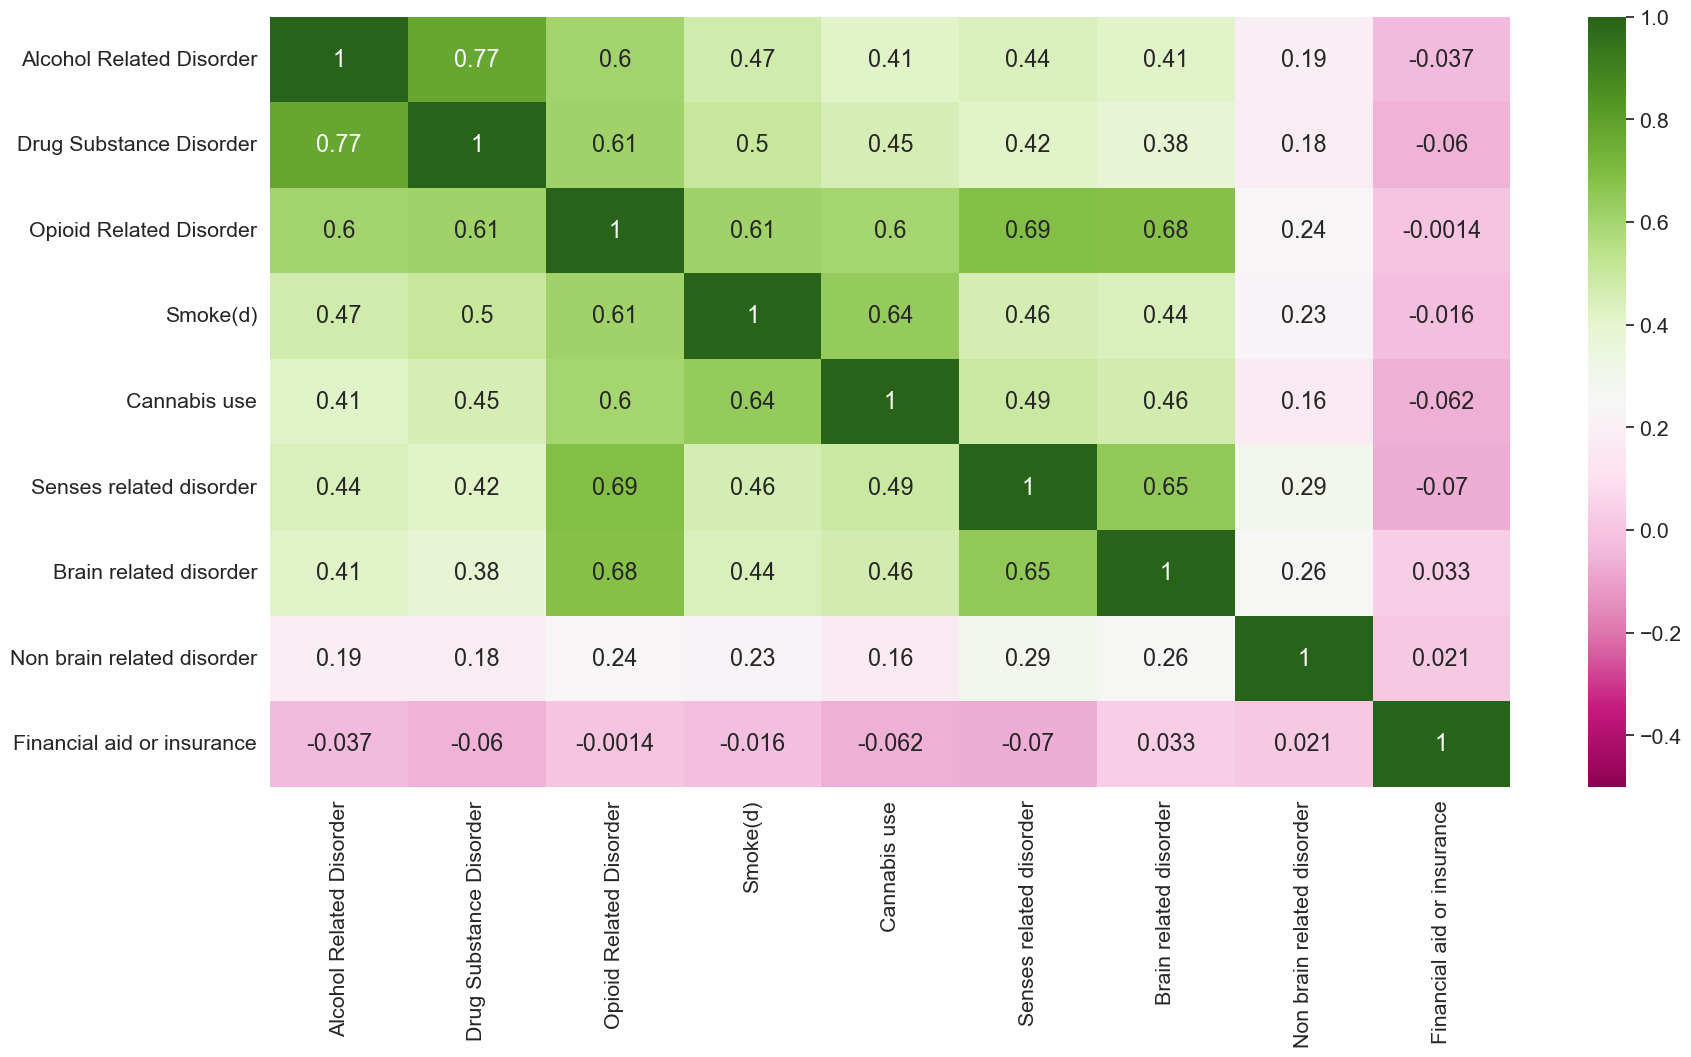

In [144]:
# Plot a correlation matrix
plt.figure(figsize=(20,10), facecolor='white')
corr_matrix = data_corr.corr()
color = sns.light_palette("seagreen", as_cmap=True)
sns.set(font_scale=1.4)
#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(cluster_corr(corr_matrix), vmin=-0.5, vmax=1, annot=True, cmap="PiYG")
plt.show()

## Substance abuse by race

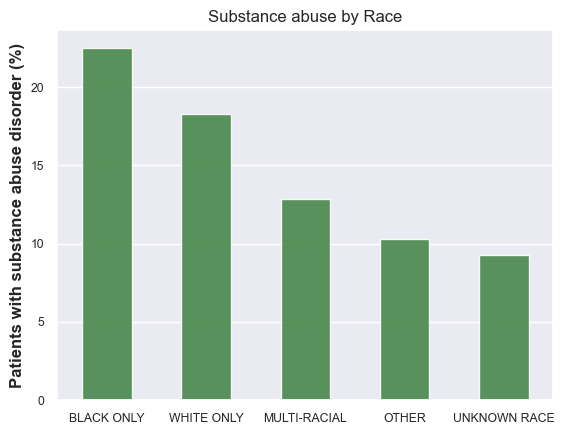

In [163]:
# group the data by substance related disorder and Race
grouped = dataset.groupby(['substance related disorder', 'Race']).size().reset_index(name='count')

# calculate the total count for 'Yes and 'No' in substance related disorder
total_count = grouped.groupby('Race')['count'].transform('sum')

# calculate the percentage for each count
grouped['percentage'] = grouped['count'] / total_count * 100

# Select the rows with 'YES' substance related disorder
filtered_grouped = grouped[grouped['substance related disorder'] == 'YES']

# Sort the values by percentage
sorted_grouped = filtered_grouped.sort_values('percentage', ascending=False)

# create a bar plot using Seaborn
sns.set_style('dark')
sns.set(font_scale=0.8)
ax = sns.barplot(data=sorted_grouped, x='Race', y='percentage', capsize=.4, width =0.5, color = "#3D9140", alpha = 0.9)
ax.set_title('Substance abuse by Race', fontsize = 12)
ax.set_xlabel('', fontsize = 12)
ax.set_ylabel('Patients with substance abuse disorder (%)', fontsize = 12, weight = 'bold')

plt.show()

## Substance abuse by gender

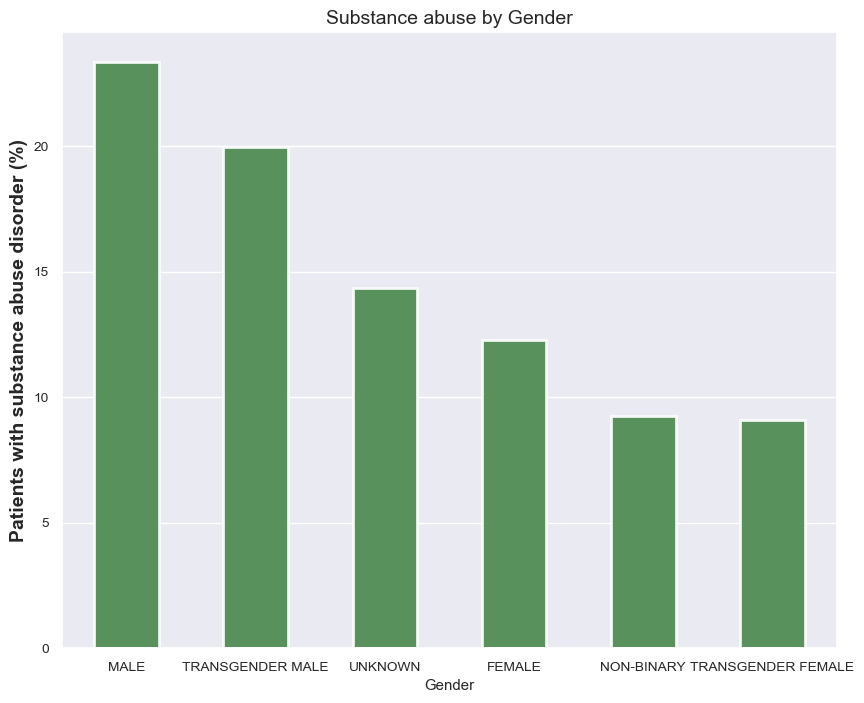

In [118]:
# group the data by substance related disorder and gender
grouped = dataset.groupby(['substance related disorder', 'Gender']).size().reset_index(name='count')

# calculate the total count for 'Yes and 'No' in substance related disorder
total_count = grouped.groupby('Gender')['count'].transform('sum')

# calculate the percentage for each count
grouped['percentage'] = grouped['count'] / total_count * 100

# Select the rows with 'YES' substance related disorder
filtered_grouped = grouped[grouped['substance related disorder'] == 'YES']

# Sort the values by percentage
sorted_grouped = filtered_grouped.sort_values('percentage', ascending=False)

# create a bar plot using Seaborn
fig, ax = plt.subplots(figsize=(10,8))

sns.set_style('whitegrid') 
sns.set(font_scale=0.87)
ax = sns.barplot(data=sorted_grouped, x='Gender', y='percentage', capsize=.4, linewidth=2, width =0.5, color = "#3D9140", alpha = 0.9)
ax.set_title('Substance abuse by Gender', fontsize = 14)
#ax.set_xlabel('Race', fontsize = 12)
ax.set_ylabel('Patients with substance abuse disorder (%)', fontsize = 14, weight = 'bold')

plt.show()

## Type of substance by age group and sexual orientation

In [180]:
# Define a table for Age Group = CHILD 
child_data = dataset[dataset['Age Group'] == 'CHILD']
child_data = child_data[child_data['substance related disorder'] == 'YES']
df = child_data[['Age Group', "Sexual Orientation", 'substance related disorder', 'Alcohol Related Disorder', 'Drug Substance Disorder', 'Opioid Related Disorder']]
df

,Age Group,Sexual Orientation,substance related disorder,Alcohol Related Disorder,Drug Substance Disorder,Opioid Related Disorder
195,CHILD,NON STRAIGHT,YES,NO,YES,NO
219,CHILD,NON STRAIGHT,YES,NO,YES,NO
656,CHILD,NON STRAIGHT,YES,NO,YES,NO
846,CHILD,UNKNOWN,YES,YES,NO,NO
942,CHILD,STRAIGHT,YES,YES,NO,NO
...,...,...,...,...,...,...
205094,CHILD,STRAIGHT,YES,NO,YES,NO
205466,CHILD,STRAIGHT,YES,NO,YES,NO
205686,CHILD,STRAIGHT,YES,NO,YES,NO
206547,CHILD,STRAIGHT,YES,NO,YES,NO


Text(0.5, 1.0, 'Age group: CHILD')

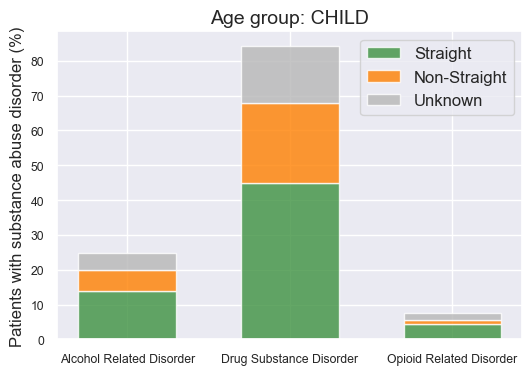

In [181]:
# calculate the percentage of each category for each column
alcohol_pct = df["Alcohol Related Disorder"].value_counts(normalize=True) * 100
drug_pct = df["Drug Substance Disorder"].value_counts(normalize=True) * 100
opioid_pct = df["Opioid Related Disorder"].value_counts(normalize=True) * 100

# calculate the percentage of each category for each column by sexual orientation
straight_alcohol_pct = df.loc[df["Sexual Orientation"] == "STRAIGHT", "Alcohol Related Disorder"].value_counts() * 100 / len(df)
non_straight_alcohol_pct = df.loc[df["Sexual Orientation"] == "NON STRAIGHT", "Alcohol Related Disorder"].value_counts() * 100 / len(df)
unknown_alcohol_pct = df.loc[df["Sexual Orientation"] == "UNKNOWN", "Alcohol Related Disorder"].value_counts() * 100 / len(df)

straight_drug_pct = df.loc[df["Sexual Orientation"] == "STRAIGHT", "Drug Substance Disorder"].value_counts() * 100 / len(df)
non_straight_drug_pct = df.loc[df["Sexual Orientation"] == "NON STRAIGHT", "Drug Substance Disorder"].value_counts() * 100 / len(df)
unknown_drug_pct = df.loc[df["Sexual Orientation"] == "UNKNOWN", "Drug Substance Disorder"].value_counts() * 100 / len(df)

straight_opioid_pct = df.loc[df["Sexual Orientation"] == "STRAIGHT", "Opioid Related Disorder"].value_counts() * 100 / len(df)
non_straight_opioid_pct = df.loc[df["Sexual Orientation"] == "NON STRAIGHT", "Opioid Related Disorder"].value_counts() * 100 / len(df)
unknown_opioid_pct = df.loc[df["Sexual Orientation"] == "UNKNOWN", "Opioid Related Disorder"].value_counts() * 100 / len(df)

# create the barplot
fig, ax = plt.subplots(figsize=(6,4))

# add the bars for Alcohol Related Disorder
ax.bar("Alcohol Related Disorder", straight_alcohol_pct["YES"], label="Straight", color="#3D9140", alpha = 0.8, width=0.6)
ax.bar("Alcohol Related Disorder", non_straight_alcohol_pct["YES"], bottom=straight_alcohol_pct["YES"], label="Non-Straight", color="#FF8000", alpha = 0.8, width=0.6)
ax.bar("Alcohol Related Disorder", unknown_alcohol_pct["YES"], bottom=non_straight_alcohol_pct["YES"] + straight_alcohol_pct["YES"], label="Unknown", color="#B7B7B7", alpha = 0.8, width=0.6)

# add the bars for Drug Substance Disorder
ax.bar("Drug Substance Disorder", straight_drug_pct["YES"], color="#3D9140", alpha = 0.8, width=0.6)
ax.bar("Drug Substance Disorder", non_straight_drug_pct["YES"], bottom=straight_drug_pct["YES"], color="#FF8000", alpha = 0.8, width=0.6)
ax.bar("Drug Substance Disorder", unknown_drug_pct["YES"], bottom=non_straight_drug_pct["YES"] + straight_drug_pct["YES"], color="#B7B7B7", alpha = 0.8, width=0.6)

# add the bars for opoids Substance Disorder
ax.bar("Opioid Related Disorder", straight_opioid_pct["YES"], color="#3D9140", alpha = 0.8, width=0.6)
ax.bar("Opioid Related Disorder", non_straight_opioid_pct["YES"], bottom=straight_opioid_pct["YES"], color="#FF8000", alpha = 0.8, width=0.6)
ax.bar("Opioid Related Disorder", unknown_opioid_pct["YES"], bottom=non_straight_opioid_pct["YES"] + straight_opioid_pct["YES"], color="#B7B7B7", alpha = 0.8, width=0.6)

plt.legend(loc='upper right', fontsize = 12)
ax.set_ylabel("Patients with substance abuse disorder (%)", fontsize = 12)
ax.set_title("Age group: CHILD", fontsize = 14)

## Stacked bar plot representing the different drug use of ADULT and relating wit sexual orientation

In [105]:
# Define a table for Age Group = ADULT 
adult_data = dataset[dataset['Age Group'] == 'ADULT']
adult_data_substance = adult_data[adult_data['substance related disorder'] == 'YES']
df = adult_data_substance[['Age Group', "Sexual Orientation", 'substance related disorder', 'Alcohol Related Disorder', 'Drug Substance Disorder', 'Opioid Related Disorder']]
df

,Age Group,Sexual Orientation,substance related disorder,Alcohol Related Disorder,Drug Substance Disorder,Opioid Related Disorder
1,ADULT,STRAIGHT,YES,YES,YES,NO
4,ADULT,STRAIGHT,YES,NO,YES,NO
14,ADULT,STRAIGHT,YES,YES,YES,NO
19,ADULT,UNKNOWN,YES,YES,YES,NO
21,ADULT,STRAIGHT,YES,NO,NO,YES
...,...,...,...,...,...,...
206589,ADULT,STRAIGHT,YES,YES,NO,NO
206590,ADULT,STRAIGHT,YES,NO,YES,NO
206604,ADULT,STRAIGHT,YES,YES,YES,YES
206605,ADULT,STRAIGHT,YES,NO,YES,NO


Text(0.5, 1.0, 'Age group: ADULT')

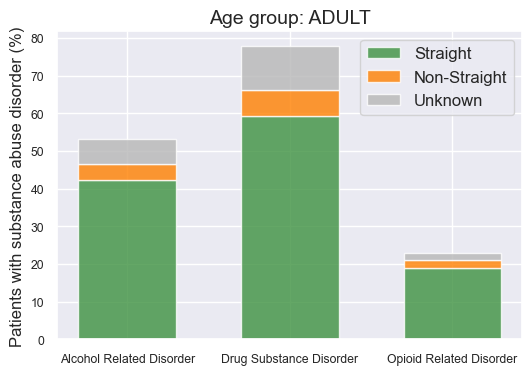

In [179]:
# calculate the percentage of each category for each column
alcohol_pct = df["Alcohol Related Disorder"].value_counts(normalize=True) * 100
drug_pct = df["Drug Substance Disorder"].value_counts(normalize=True) * 100
opioid_pct = df["Opioid Related Disorder"].value_counts(normalize=True) * 100

# calculate the percentage of each category for each column by sexual orientation
straight_alcohol_pct = df.loc[df["Sexual Orientation"] == "STRAIGHT", "Alcohol Related Disorder"].value_counts() * 100 / len(df)
non_straight_alcohol_pct = df.loc[df["Sexual Orientation"] == "NON STRAIGHT", "Alcohol Related Disorder"].value_counts() * 100 / len(df)
unknown_alcohol_pct = df.loc[df["Sexual Orientation"] == "UNKNOWN", "Alcohol Related Disorder"].value_counts() * 100 / len(df)

straight_drug_pct = df.loc[df["Sexual Orientation"] == "STRAIGHT", "Drug Substance Disorder"].value_counts() * 100 / len(df)
non_straight_drug_pct = df.loc[df["Sexual Orientation"] == "NON STRAIGHT", "Drug Substance Disorder"].value_counts() * 100 / len(df)
unknown_drug_pct = df.loc[df["Sexual Orientation"] == "UNKNOWN", "Drug Substance Disorder"].value_counts() * 100 / len(df)

straight_opioid_pct = df.loc[df["Sexual Orientation"] == "STRAIGHT", "Opioid Related Disorder"].value_counts() * 100 / len(df)
non_straight_opioid_pct = df.loc[df["Sexual Orientation"] == "NON STRAIGHT", "Opioid Related Disorder"].value_counts() * 100 / len(df)
unknown_opioid_pct = df.loc[df["Sexual Orientation"] == "UNKNOWN", "Opioid Related Disorder"].value_counts() * 100 / len(df)

# create the barplot
fig, ax = plt.subplots(figsize=(6,4))

# add the bars for Alcohol Related Disorder
ax.bar("Alcohol Related Disorder", straight_alcohol_pct["YES"], label="Straight", color="#3D9140", alpha = 0.8, width=0.6)
ax.bar("Alcohol Related Disorder", non_straight_alcohol_pct["YES"], bottom=straight_alcohol_pct["YES"], label="Non-Straight", color="#FF8000", alpha = 0.8, width=0.6)
ax.bar("Alcohol Related Disorder", unknown_alcohol_pct["YES"], bottom=non_straight_alcohol_pct["YES"] + straight_alcohol_pct["YES"], label="Unknown", color="#B7B7B7", alpha = 0.8, width=0.6)

# add the bars for Drug Substance Disorder
ax.bar("Drug Substance Disorder", straight_drug_pct["YES"], color="#3D9140", alpha = 0.8, width=0.6)
ax.bar("Drug Substance Disorder", non_straight_drug_pct["YES"], bottom=straight_drug_pct["YES"], color="#FF8000", alpha = 0.8, width=0.6)
ax.bar("Drug Substance Disorder", unknown_drug_pct["YES"], bottom=non_straight_drug_pct["YES"] + straight_drug_pct["YES"], color="#B7B7B7", alpha = 0.8, width=0.6)

# add the bars for opoids Substance Disorder
ax.bar("Opioid Related Disorder", straight_opioid_pct["YES"], color="#3D9140", alpha = 0.8, width=0.6)
ax.bar("Opioid Related Disorder", non_straight_opioid_pct["YES"], bottom=straight_opioid_pct["YES"], color="#FF8000", alpha = 0.8, width=0.6)
ax.bar("Opioid Related Disorder", unknown_opioid_pct["YES"], bottom=non_straight_opioid_pct["YES"] + straight_opioid_pct["YES"], color="#B7B7B7", alpha = 0.8, width=0.6)

plt.legend(loc='upper right', fontsize = 12)
ax.set_ylabel("Patients with substance abuse disorder (%)", fontsize = 12)
ax.set_title("Age group: ADULT", fontsize = 14)

## Effect of having or not a financial aid or insurance on the substance abuse 

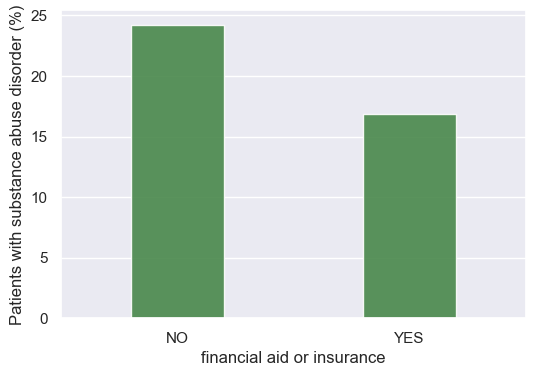

In [186]:
# group the data by substance related disorder and financial aid or insurance
grouped = dataset.groupby(['substance related disorder', 'Financial aid or insurance']).size().reset_index(name='count')

# calculate the total count for 'Yes and 'No' in substance related disorder
total_count = grouped.groupby('Financial aid or insurance')['count'].transform('sum')

# calculate the percentage for each count
grouped['percentage'] = grouped['count'] / total_count * 100

# Select the rows with 'YES' substance related disorder
filtered_grouped = grouped[grouped['substance related disorder'] == 'YES']

# create a bar plot using Seaborn
fig, ax = plt.subplots(figsize=(6,4))

sns.set_style('whitegrid') 
sns.set(font_scale=1)
ax = sns.barplot(data=filtered_grouped, x='Financial aid or insurance', y='percentage', capsize=.4, width =0.4, color = "#3D9140", alpha = 0.9)
#ax.set_title('Effect of financial aid or insurance on substance abuse', fontsize = 14)
ax.set_xlabel('financial aid or insurance', fontsize = 12)
ax.set_ylabel('Patients with substance abuse disorder (%)', fontsize = 12)

plt.show()

## Evaluating the household composition of patients with or without substance abuse

In [99]:
# group the data by substance related disorder and Household Composition
grouped = dataset.groupby(['Household Composition', 'substance related disorder']).size().reset_index(name='count')

# calculate the total count for 'Yes and 'No' in substance related disorder
total_count = grouped.groupby('substance related disorder')['count'].transform('sum')

# calculate the percentage for each count
grouped['percentage'] = grouped['count'] / total_count * 100
grouped

,Household Composition,substance related disorder,count,percentage
0,COHABITATES WITH OTHERS,NO,98938,60.629347
1,COHABITATES WITH OTHERS,UNKNOWN,6088,77.941365
2,COHABITATES WITH OTHERS,YES,13019,36.553796
3,HOMELESS,NO,3290,2.016117
4,HOMELESS,UNKNOWN,116,1.485085
5,HOMELESS,YES,1954,5.486298
6,LIVES ALONE,NO,40969,25.105861
7,LIVES ALONE,UNKNOWN,1054,13.493791
8,LIVES ALONE,YES,12055,33.847147
9,NOT APPLICABLE,NO,15321,9.388731


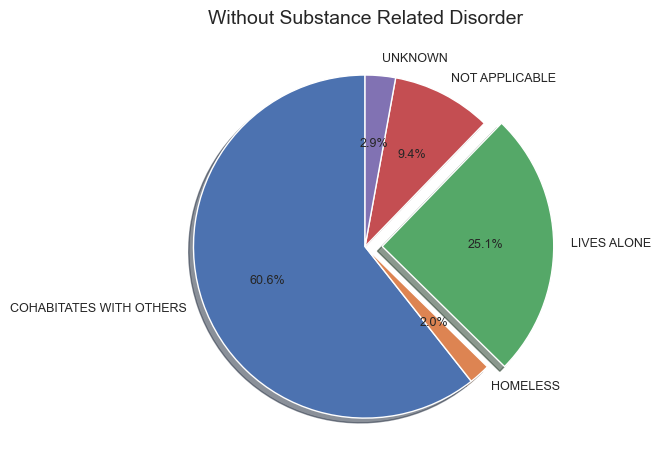

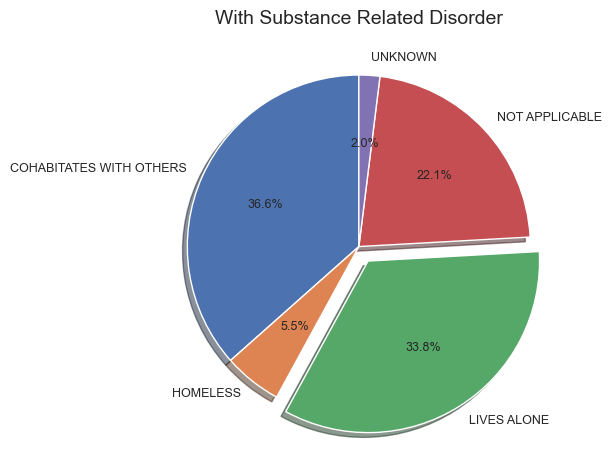

In [100]:
# Separate the dataframe into two groups
no_srd = grouped[grouped['substance related disorder'] == 'NO']
yes_srd = grouped[grouped['substance related disorder'] == 'YES']

# Plot the "substance related disorder = NO" group
explode = (0, 0, 0.1, 0, 0)
plt.pie(no_srd['percentage'], labels=no_srd['Household Composition'], autopct='%1.1f%%', shadow=True, startangle=90, explode=explode, textprops={'fontsize': 9})
plt.title('Without Substance Related Disorder', fontsize=14)
plt.tight_layout()
plt.show()

# Plot the "substance related disorder = YES" group
plt.pie(yes_srd['percentage'], labels=yes_srd['Household Composition'], autopct='%1.1f%%', shadow=True, startangle=90, explode=explode, textprops={'fontsize': 9})
plt.title('With Substance Related Disorder', fontsize=14)
plt.tight_layout()
plt.show()


## Evaluating the living situation of patients with or without substance abuse

In [101]:
# group the data by substance related disorder and living situation
grouped = dataset.groupby(['Living Situation', 'substance related disorder']).size().reset_index(name='count')

# calculate the total count for 'Yes and 'No' in substance related disorder
total_count = grouped.groupby('substance related disorder')['count'].transform('sum')

# calculate the percentage for each count
grouped['percentage'] = grouped['count'] / total_count * 100
grouped

,Living Situation,substance related disorder,count,percentage
0,HOMELESS,NO,3290,2.016117
1,HOMELESS,UNKNOWN,116,1.485085
2,HOMELESS,YES,1954,5.486298
3,INSTITUTIONAL SETTING,NO,653,0.400159
4,INSTITUTIONAL SETTING,UNKNOWN,39,0.499296
5,INSTITUTIONAL SETTING,YES,490,1.375786
6,OTHER LIVING SITUATION,NO,14668,8.988571
7,OTHER LIVING SITUATION,UNKNOWN,261,3.341442
8,OTHER LIVING SITUATION,YES,7398,20.771563
9,PRIVATE RESIDENCE,NO,135033,82.748414


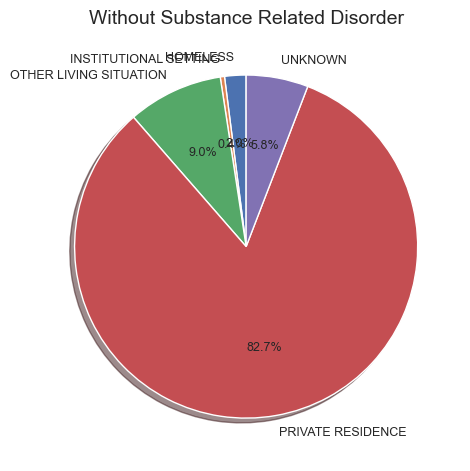

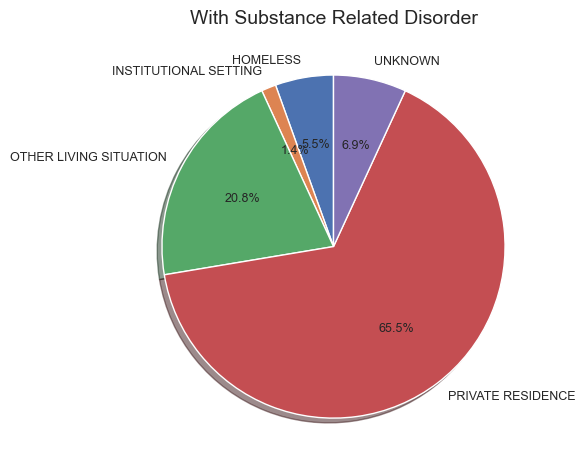

In [102]:
# Separate the dataframe into two groups
no_srd = grouped[grouped['substance related disorder'] == 'NO']
yes_srd = grouped[grouped['substance related disorder'] == 'YES']

# Plot the "substance related disorder = NO" group
explode = (0, 0, 0, 0, 0)
plt.pie(no_srd['percentage'], labels=no_srd['Living Situation'], autopct='%1.1f%%', shadow=True, startangle=90, explode=explode, textprops={'fontsize': 9})
plt.title('Without Substance Related Disorder', fontsize=14)
plt.tight_layout()
plt.show()

# Plot the "substance related disorder = YES" group
plt.pie(yes_srd['percentage'], labels=yes_srd['Living Situation'], autopct='%1.1f%%', shadow=True, startangle=90, explode=explode, textprops={'fontsize': 9})
plt.title('With Substance Related Disorder', fontsize=14)
plt.tight_layout()
plt.show()


In [107]:
dataset.columns

Index(['Age Group', 'Sexual Orientation', 'Race', 'Living Situation',
       'Household Composition', 'Religious Preference', 'Veteran Status',
       'Employment Status', 'Number Of Hours Worked Each Week',
       'Education Status', 'Mental Illness', 'Intellectual Disability',
       'Autism Spectrum', 'Other Developmental Disability',
       'Alcohol Related Disorder', 'Drug Substance Disorder',
       'Opioid Related Disorder', 'Mobility Impairment Disorder',
       'Hearing Impairment', 'Visual Impairment', 'Speech Impairment',
       'Hyperlipidemia', 'High Blood Pressure', 'Diabetes', 'Obesity',
       'Heart Attack', 'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
       'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
       'Endocrine Condition', 'Neurological Condition',
       'Traumatic Brain Injury', 'Joint Disease', 'Cancer',
       'Other Chronic Med Condition', 'No Chronic Med Condition',
       'Unknown Chronic Med Condition', 'Serious Mental Illness',
     

## Substance abuse by veteran status

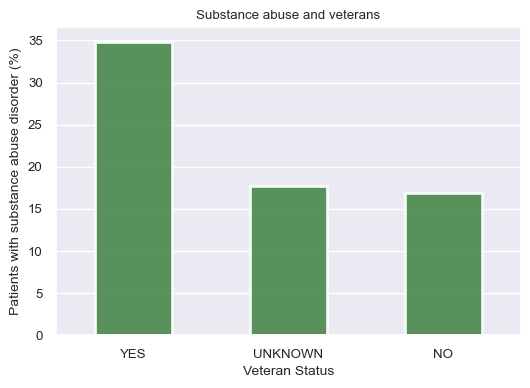

In [119]:
# group the data by substance related disorder and Veteran status
grouped = dataset.groupby(['substance related disorder', 'Veteran Status']).size().reset_index(name='count')

# calculate the total count for 'Yes and 'No' in substance related disorder
total_count = grouped.groupby('Veteran Status')['count'].transform('sum')

# calculate the percentage for each count
grouped['percentage'] = grouped['count'] / total_count * 100

# Select the rows with 'YES' substance related disorder
filtered_grouped = grouped[grouped['substance related disorder'] == 'YES']

# Sort the values by percentage
sorted_grouped = filtered_grouped.sort_values('percentage', ascending=False)

# create a bar plot using Seaborn
fig, ax = plt.subplots(figsize=(6,4))

sns.set_style('whitegrid') 
sns.set(font_scale=0.8)
ax = sns.barplot(data=sorted_grouped, x='Veteran Status', y='percentage', capsize=.4, linewidth=2, width =0.5, color = "#3D9140", alpha = 0.9)
ax.set_title('Substance abuse and veterans')
ax.set_xlabel('Veteran Status', fontsize = 10)
ax.set_ylabel('Patients with substance abuse disorder (%)', fontsize = 10)

plt.show()

## Evaluating the effect of employment status on the substance abuse 

In [120]:
# group the data by substance related disorder and employment status 
grouped = dataset.groupby(['Employment Status', 'substance related disorder']).size().reset_index(name='count')

# calculate the total count for 'Yes and 'No' in substance related disorder
total_count = grouped.groupby('substance related disorder')['count'].transform('sum')

# calculate the percentage for each count
grouped['percentage'] = grouped['count'] / total_count * 100
grouped

,Employment Status,substance related disorder,count,percentage
0,EMPLOYED,NO,34279,21.006220
1,EMPLOYED,UNKNOWN,1029,13.173729
2,EMPLOYED,YES,6654,18.682615
3,NON-PAID/VOLUNTEER,NO,877,0.537427
4,NON-PAID/VOLUNTEER,UNKNOWN,10,0.128025
5,NON-PAID/VOLUNTEER,YES,208,0.584007
6,"UNEMPLOYED, LOOKING FOR WORK",NO,15143,9.279652
7,"UNEMPLOYED, LOOKING FOR WORK",UNKNOWN,907,11.611829
8,"UNEMPLOYED, LOOKING FOR WORK",YES,5103,14.327830
9,"UNEMPLOYED, NOT LOOKING FOR WORK",NO,102687,62.926740


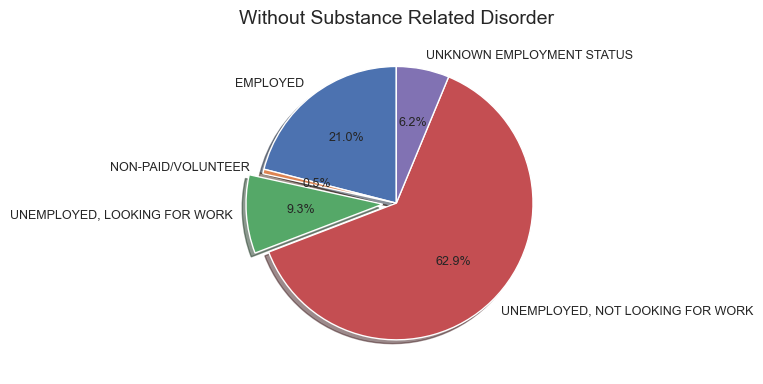

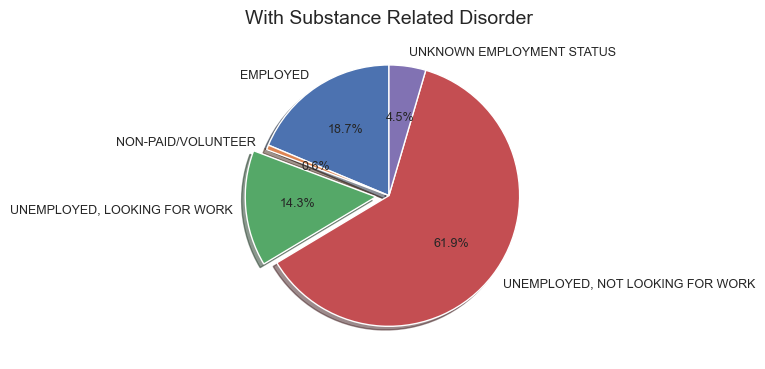

In [121]:
# Separate the dataframe into two groups
no_srd = grouped[grouped['substance related disorder'] == 'NO']
yes_srd = grouped[grouped['substance related disorder'] == 'YES']

# Plot the "substance related disorder = NO" group
explode = (0, 0, 0.1, 0, 0)
plt.pie(no_srd['percentage'], labels=no_srd['Employment Status'], autopct='%1.1f%%', shadow=True, startangle=90, explode=explode, textprops={'fontsize': 9})
plt.title('Without Substance Related Disorder', fontsize=14)
plt.tight_layout()
plt.show()

# Plot the "substance related disorder = YES" group
plt.pie(yes_srd['percentage'], labels=yes_srd['Employment Status'], autopct='%1.1f%%', shadow=True, startangle=90, explode=explode, textprops={'fontsize': 9})
plt.title('With Substance Related Disorder', fontsize=14)
plt.tight_layout()
plt.show()

## Evaluating the effect of number of Hours worked each week on the substance abuse 

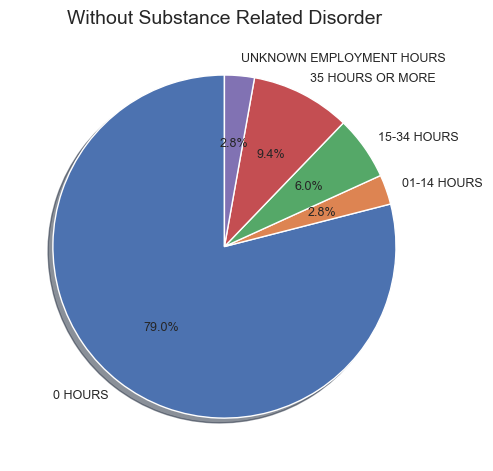

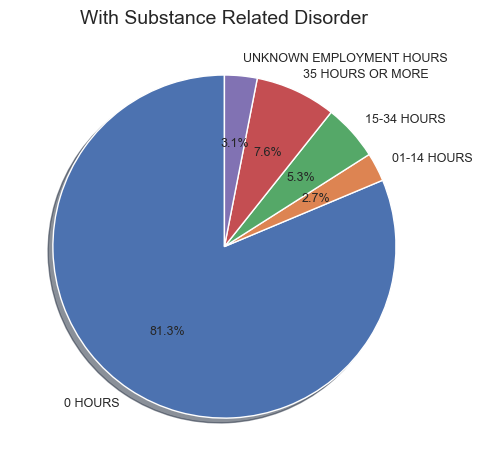

In [122]:
# group the data by substance related disorder and 'Number Of Hours Worked Each Week' 
grouped = dataset.groupby(['Number Of Hours Worked Each Week', 'substance related disorder']).size().reset_index(name='count')

# calculate the total count for 'Yes and 'No' in substance related disorder
total_count = grouped.groupby('substance related disorder')['count'].transform('sum')

# calculate the percentage for each count
grouped['percentage'] = grouped['count'] / total_count * 100
grouped

# Separate the dataframe into two groups
no_srd = grouped[grouped['substance related disorder'] == 'NO']
yes_srd = grouped[grouped['substance related disorder'] == 'YES']

# Plot the "substance related disorder = NO" group
explode = (0, 0, 0, 0, 0)
plt.pie(no_srd['percentage'], labels=no_srd['Number Of Hours Worked Each Week'], autopct='%1.1f%%', shadow=True, startangle=90, explode=explode, textprops={'fontsize': 9})
plt.title('Without Substance Related Disorder', fontsize=14)
plt.tight_layout()
plt.show()

# Plot the "substance related disorder = YES" group
plt.pie(yes_srd['percentage'], labels=yes_srd['Number Of Hours Worked Each Week'], autopct='%1.1f%%', shadow=True, startangle=90, explode=explode, textprops={'fontsize': 9})
plt.title('With Substance Related Disorder', fontsize=14)
plt.tight_layout()
plt.show()